In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **EDA**

loading annotations into memory...
Done (t=1.43s)
creating index...
index created!
Unique category IDs in annotations:
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90}
Number of images: 5000
Number of annotations: 36781


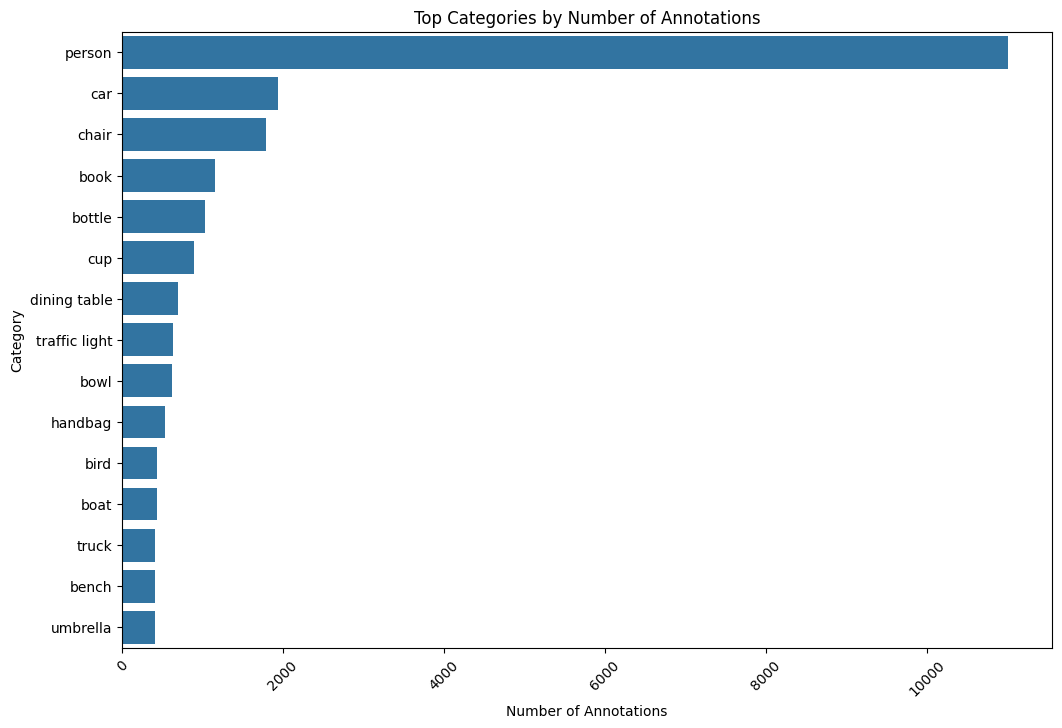

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load COCO annotations
coco = COCO('/content/data/annotations/instances_val2017.json')

# Get all categories
categories = coco.loadCats(coco.getCatIds())
category_names = [cat['name'] for cat in categories]

# Print unique category IDs to debug
print("Unique category IDs in annotations:")
unique_category_ids = set()
for ann in coco.anns.values():
    unique_category_ids.add(ann['category_id'])
print(unique_category_ids)

# Create a mapping from category ID to category name
category_id_to_name = {cat['id']: cat['name'] for cat in categories}

# Count the number of images and annotations
num_images = len(coco.imgs)
num_annotations = len(coco.anns)

print(f"Number of images: {num_images}")
print(f"Number of annotations: {num_annotations}")

# Count annotations per category using the mapping
category_counts = {name: 0 for name in category_names}
for ann in coco.anns.values():
    category_id = ann['category_id']
    if category_id in category_id_to_name:
        category_counts[category_id_to_name[category_id]] += 1

# Convert to DataFrame for easier plotting
category_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])

# Plot the distribution of categories
# Limit to top N categories
top_n = 15  
top_categories = category_df.sort_values('Count', ascending=False).head(top_n)

# Plot the distribution of top categories
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Category', data=top_categories)
plt.title('Top Categories by Number of Annotations')
plt.xlabel('Number of Annotations')
plt.ylabel('Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


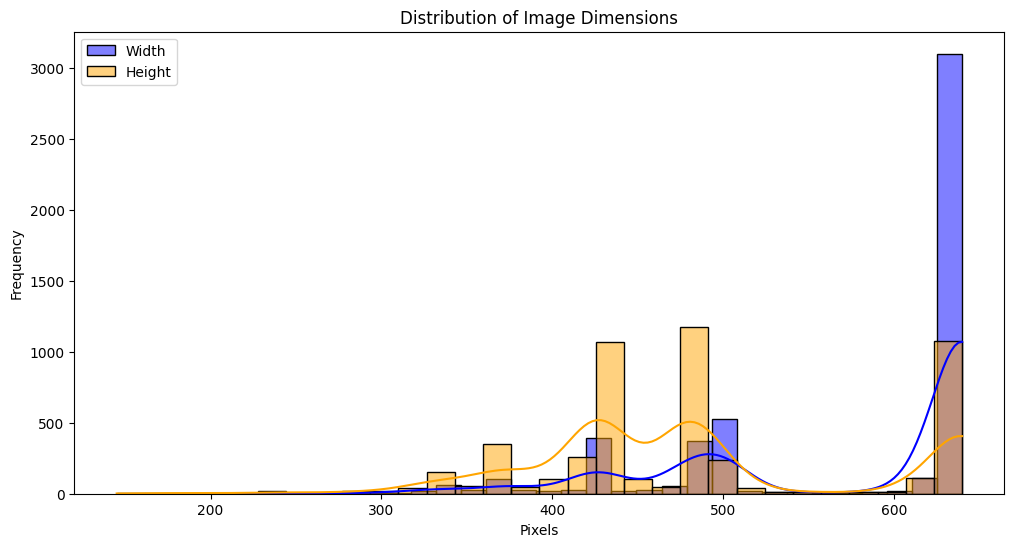

In [27]:
# Get image dimensions
image_dimensions = []
for img_id in coco.imgs.keys():
    img = coco.imgs[img_id]
    image_dimensions.append((img['width'], img['height']))

# Convert to DataFrame
dimensions_df = pd.DataFrame(image_dimensions, columns=['Width', 'Height'])

# Plot the distribution of image dimensions
plt.figure(figsize=(12, 6))
sns.histplot(dimensions_df['Width'], bins=30, color='blue', label='Width', kde=True)
sns.histplot(dimensions_df['Height'], bins=30, color='orange', label='Height', kde=True)
plt.title('Distribution of Image Dimensions')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()
plt.show()


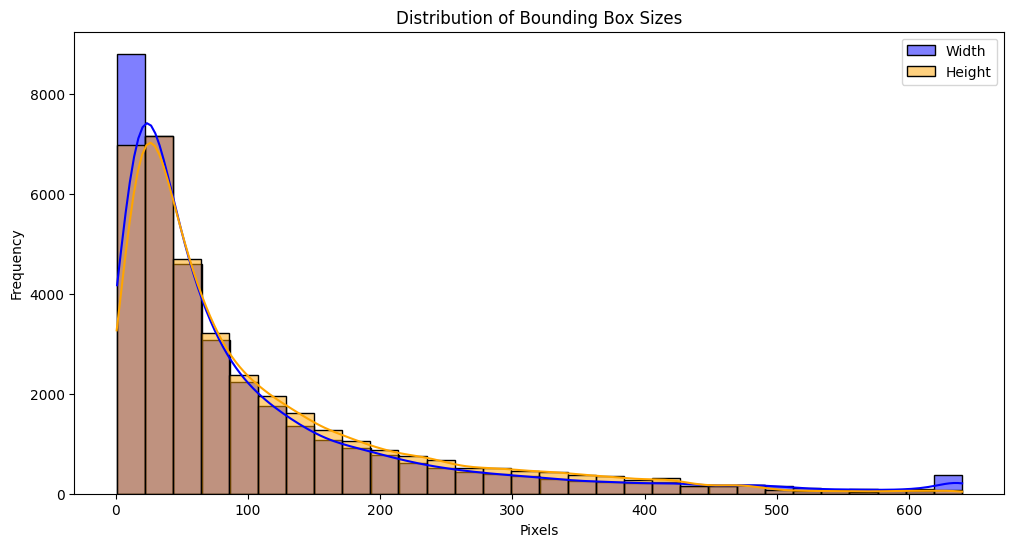

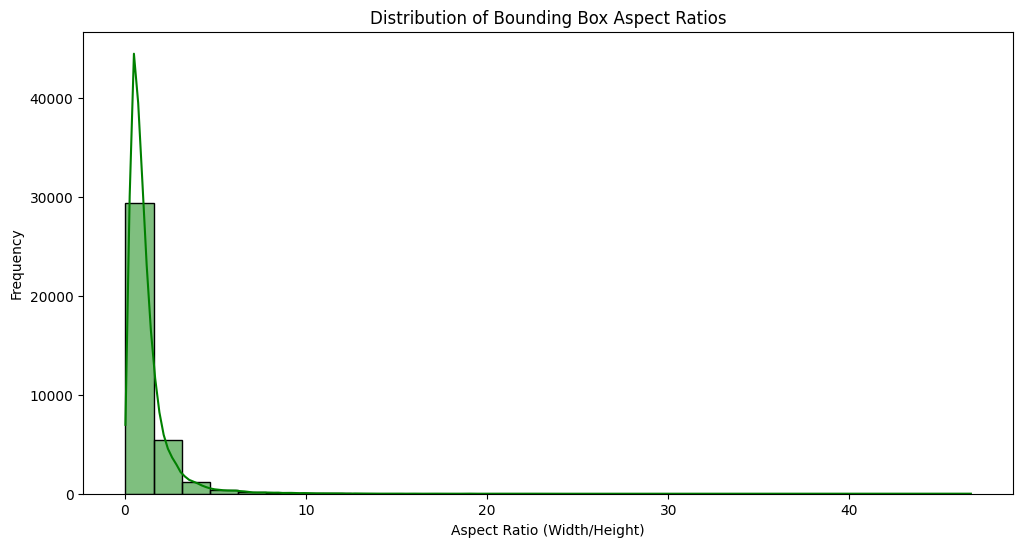

In [28]:
# Collect bounding box sizes and aspect ratios
bbox_widths = []
bbox_heights = []
for ann in coco.anns.values():
    if ann['category_id'] in category_id_to_name:
        x, y, w, h = ann['bbox']
        bbox_widths.append(w)
        bbox_heights.append(h)

# Convert to DataFrame
bbox_df = pd.DataFrame({'Width': bbox_widths, 'Height': bbox_heights})

# Plot bounding box sizes
plt.figure(figsize=(12, 6))
sns.histplot(bbox_df['Width'], bins=30, color='blue', label='Width', kde=True)
sns.histplot(bbox_df['Height'], bins=30, color='orange', label='Height', kde=True)
plt.title('Distribution of Bounding Box Sizes')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Calculate aspect ratios
bbox_df['Aspect Ratio'] = bbox_df['Width'] / bbox_df['Height']

# Plot aspect ratio distribution
plt.figure(figsize=(12, 6))
sns.histplot(bbox_df['Aspect Ratio'], bins=30, color='green', kde=True)
plt.title('Distribution of Bounding Box Aspect Ratios')
plt.xlabel('Aspect Ratio (Width/Height)')
plt.ylabel('Frequency')
plt.show()


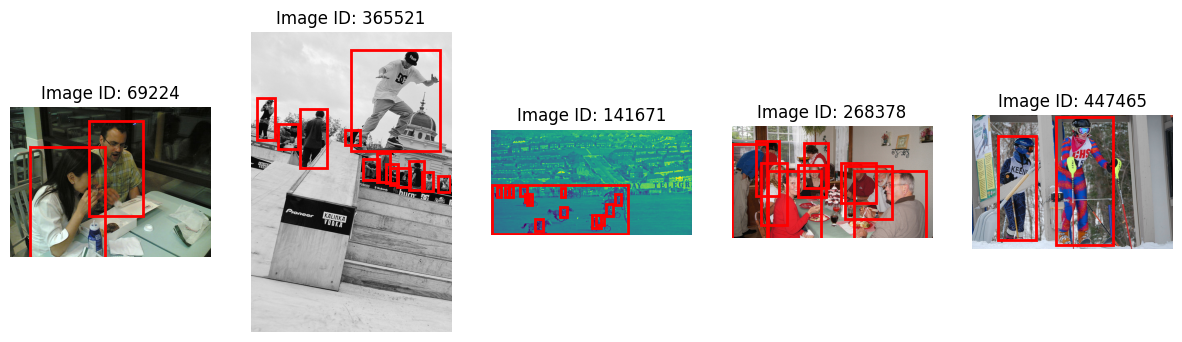

In [25]:
import urllib
import numpy as np
from PIL import Image

def visualize_samples(coco, image_ids, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i, img_id in enumerate(random.sample(image_ids, num_samples)):
        img = coco.loadImgs(img_id)[0]
        image_url = f"http://images.cocodataset.org/val2017/{img['file_name']}"

        # Open the image from the URL
        image = Image.open(urllib.request.urlopen(image_url))
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Image ID: {img_id}")

        # Draw bounding boxes
        ann_ids = coco.getAnnIds(imgIds=img_id)
        annotations = coco.loadAnns(ann_ids)
        for ann in annotations:
            if ann['category_id'] == person_category_id:
                x, y, w, h = ann['bbox']
                plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, color='red', linewidth=2))
    plt.show()

# Visualize sample images
visualize_samples(coco, image_ids_with_person)


In [2]:
# Install dependencies for Training
!pip install torch
!pip install ultralytics
!pip install pycocotools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 20.7 MB/s eta 0:00:00


In [3]:
# Install wget if it isn't already installed
!pip install wget

# Create a directory for storing annotations
!mkdir -p /content/data

# Download the COCO 2017 Annotations dataset
!wget -P /content/data/ http://images.cocodataset.org/annotations/annotations_trainval2017.zip


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=69440de7ea2678daadc4b150602f3643018b8e4c05cedc2d373385ab25f81381
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
--2024-12-30 06:35:16--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.28.149, 52.216.45.1, 52.217.120.233, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.28.149|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘/content/data/annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  31.9MB/s    in 7.9s    

2024-12-30 06:35:24 (30.4 MB/s) - ‘/content/data/annotations_trainval2017.zip’ saved [252907541/252907541]



In [4]:
# Unzip the annotations
!unzip -q /content/data/annotations_trainval2017.zip -d /content/data/

In [5]:
from pycocotools.coco import COCO
import random
import os
import urllib

# Load the COCO dataset annotations
coco = COCO('/content/data/annotations/instances_val2017.json')
person_category_id = coco.getCatIds(catNms=['person'])[0]

# Retrieve all image IDs that include the 'person' category
image_ids_with_person = coco.getImgIds(catIds=[person_category_id])

# Randomly choose 1000 images that contain the 'person' object
selected_image_ids = random.sample(image_ids_with_person, 1000)
selected_images = coco.loadImgs(selected_image_ids)


loading annotations into memory...
Done (t=0.62s)
creating index...
index created!


In [6]:
os.makedirs('/content/data/images', exist_ok=True)

In [7]:
# Download images according to the selected annotations
for img in selected_images:
    image_url = f"http://images.cocodataset.org/val2017/{img['file_name']}"
    image_path = f"/content/data/images/{img['file_name']}"

    # Retrieve the image from the URL
    urllib.request.urlretrieve(image_url, image_path)


In [8]:
# Create a directory for label files
os.makedirs('data/labels', exist_ok=True)

for img in selected_images:
    # Retrieve bounding box annotations in YOLO format
    ann_ids = coco.getAnnIds(imgIds=img['id'], catIds=[person_category_id])
    annotations = coco.loadAnns(ann_ids)
    label_file_path = f"data/labels/{img['file_name'].replace('.jpg', '.txt')}"

    img_width = img['width']
    img_height = img['height']

    with open(label_file_path, 'w') as f:
        for ann in annotations:
            if ann['category_id'] == person_category_id:
                x, y, w, h = ann['bbox']
                x_center = (x + w / 2) / img_width
                y_center = (y + h / 2) / img_height
                width = w / img_width
                height = h / img_height

                f.write(f"0 {x_center} {y_center} {width} {height}\n")

In [9]:
import shutil
import math

# Create directories for training data
os.makedirs('data/train/images', exist_ok=True)
os.makedirs('data/train/labels', exist_ok=True)

# Create directories for validation data
os.makedirs('data/val/images', exist_ok=True)
os.makedirs('data/val/labels', exist_ok=True)

# Create directories for test data
os.makedirs('data/test/images', exist_ok=True)
os.makedirs('data/test/labels', exist_ok=True)

# Calculate the number of images for each dataset split
total_images = len(selected_images)
train_count = math.floor(0.8 * total_images)
val_count = math.floor(0.1 * total_images)
test_count = total_images - train_count - val_count

# Copy images and labels into their respective directories
for img in selected_images[:train_count]:
    shutil.copyfile(f"/content/data/images/{img['file_name']}", f"data/train/images/{img['file_name']}")
    shutil.copyfile(f"data/labels/{img['file_name'].replace('.jpg', '.txt')}", f"data/train/labels/{img['file_name'].replace('.jpg', '.txt')}")

for img in selected_images[train_count:train_count + val_count]:
    shutil.copyfile(f"/content/data/images/{img['file_name']}", f"data/val/images/{img['file_name']}")
    shutil.copyfile(f"data/labels/{img['file_name'].replace('.jpg', '.txt')}", f"data/val/labels/{img['file_name'].replace('.jpg', '.txt')}")

for img in selected_images[train_count + val_count:]:
    shutil.copyfile(f"/content/data/images/{img['file_name']}", f"data/test/images/{img['file_name']}")
    shutil.copyfile(f"data/labels/{img['file_name'].replace('.jpg', '.txt')}", f"data/test/labels/{img['file_name'].replace('.jpg', '.txt')}")


In [10]:
# Create the YOLO configuration file (coco.yaml)
with open('coco.yaml', 'w') as f:
    f.write('path: /content/data\n')
    f.write('train: /content/data/train/images\n')
    f.write('val: /content/data/val/images\n')
    f.write('test: /content/data/test/images\n')
    f.write('nc: 1\n')  # Number of classes
    f.write("names: ['person']\n")  # List of class names


In [11]:
from ultralytics import YOLO
import torch

!rm -rf runs/
!yolo task=detect mode=train model=yolov8x.pt data=coco.yaml epochs=50

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 131M/131M [00:00<00:00, 371MB/s]
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=coco.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=No

In [12]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=coco.yaml

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/data/val/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100% 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:06<00:00,  1.06it/s]
                   all        100        481        0.7      0.543      0.621      0.368
Speed: 0.2ms preprocess, 52.0ms inference, 0.0ms loss, 8.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [15]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source="/content/data/images/000000001268.jpg" save=True conf=0.5

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs

image 1/1 /content/data/images/000000001268.jpg: 448x640 4 persons, 69.4ms
Speed: 1.9ms preprocess, 69.4ms inference, 522.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


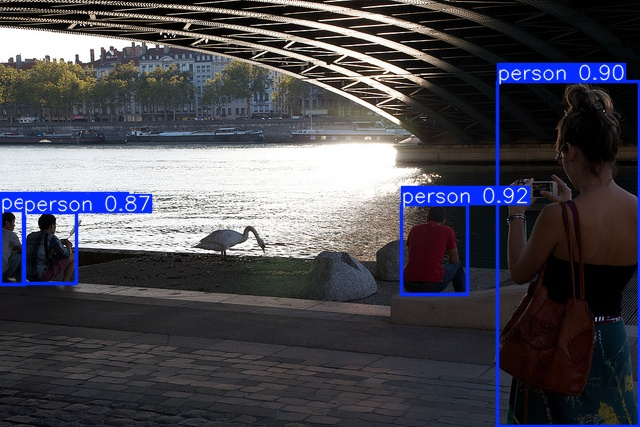

In [17]:
from IPython.display import Image, display

predicted_image_path = '/content/runs/detect/predict/000000001268.jpg'

display(Image(filename=predicted_image_path))